In [36]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score


**Load the data**

In [37]:
test_data = pd.read_excel('test.xlsx')
train_data= pd.read_csv('Train.csv')

In [38]:
train_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0.0,Yes,No,1.0,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0.0,No,No,34.0,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0.0,No,No,2.0,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0.0,No,No,45.0,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0.0,No,No,2.0,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [39]:
test_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,2087-QAREY,Female,0,Yes,No,22.0,Yes,No,DSL,No,Yes,Yes,No,No,No,Month-to-month,Yes,Mailed check,54.70,1178.75
1,0601-WZHJF,Male,0,Yes,No,14.0,No,No phone service,DSL,No,No,No,No,Yes,Yes,Month-to-month,No,Electronic check,46.35,667.7
2,4423-JWZJN,Male,0,Yes,Yes,64.0,Yes,Yes,Fiber optic,No,No,Yes,No,No,Yes,One year,No,Credit card (automatic),90.25,5629.15
3,5143-WMWOG,Male,0,No,No,1.0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Electronic check,19.95,19.95
4,6490-FGZAT,Male,0,No,No,6.0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.65,109.3


In [40]:
train_data.shape

(5635, 21)

In [41]:
test_data.shape

(1408, 20)

In [42]:
train_data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,5628.000000,5622.000000,5619.000000
mean,0.160270,32.286375,64.854983
std,0.366889,24.591460,30.105189
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.550000
50%,0.000000,29.000000,70.400000
75%,0.000000,55.000000,89.900000
max,1.000000,72.000000,118.750000


In [43]:
test_data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,1408.000000,1400.000000,1400.00000
mean,0.169034,32.732143,64.31600
std,0.374915,24.449954,30.05609
min,0.000000,0.000000,18.55000
25%,0.000000,9.000000,35.27500
50%,0.000000,30.000000,70.10000
75%,0.000000,56.000000,89.61250
max,1.000000,72.000000,118.20000


In [44]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5635 entries, 0 to 5634
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5635 non-null   object 
 1   gender            5635 non-null   object 
 2   SeniorCitizen     5628 non-null   float64
 3   Partner           5635 non-null   object 
 4   Dependents        5635 non-null   object 
 5   tenure            5622 non-null   float64
 6   PhoneService      5622 non-null   object 
 7   MultipleLines     5622 non-null   object 
 8   InternetService   5598 non-null   object 
 9   OnlineSecurity    5620 non-null   object 
 10  OnlineBackup      5620 non-null   object 
 11  DeviceProtection  5620 non-null   object 
 12  TechSupport       5620 non-null   object 
 13  StreamingTV       5613 non-null   object 
 14  StreamingMovies   5621 non-null   object 
 15  Contract          5610 non-null   object 
 16  PaperlessBilling  5621 non-null   object 


In [45]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1408 entries, 0 to 1407
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        1408 non-null   object 
 1   gender            1408 non-null   object 
 2   SeniorCitizen     1408 non-null   int64  
 3   Partner           1408 non-null   object 
 4   Dependents        1408 non-null   object 
 5   tenure            1400 non-null   float64
 6   PhoneService      1397 non-null   object 
 7   MultipleLines     1396 non-null   object 
 8   InternetService   1400 non-null   object 
 9   OnlineSecurity    1400 non-null   object 
 10  OnlineBackup      1400 non-null   object 
 11  DeviceProtection  1398 non-null   object 
 12  TechSupport       1398 non-null   object 
 13  StreamingTV       1400 non-null   object 
 14  StreamingMovies   1393 non-null   object 
 15  Contract          1393 non-null   object 
 16  PaperlessBilling  1393 non-null   object 


In [46]:
train_data.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,7
Partner,0
Dependents,0
tenure,13
PhoneService,13
MultipleLines,13
InternetService,37
OnlineSecurity,15


In [47]:
test_data.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,8
PhoneService,11
MultipleLines,12
InternetService,8
OnlineSecurity,8


In [58]:
train_data['TotalCharges'] = pd.to_numeric(train_data['TotalCharges'], errors='coerce')
test_data['TotalCharges'] = pd.to_numeric(test_data['TotalCharges'], errors='coerce')
train_data['TotalCharges'].fillna(train_data['TotalCharges'].median(), inplace=True)
test_data['TotalCharges'].fillna(test_data['TotalCharges'].median(), inplace=True)

train_data['SeniorCitizen'] = train_data['SeniorCitizen'].replace({1: 'Yes', 0: 'No'})
test_data['SeniorCitizen'] = test_data['SeniorCitizen'].replace({1: 'Yes', 0: 'No'})


train_data.dropna(inplace=True)
test_data.dropna(inplace=True)


In [49]:
train_data.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [50]:
test_data.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


**Exploratary Data Analysis**

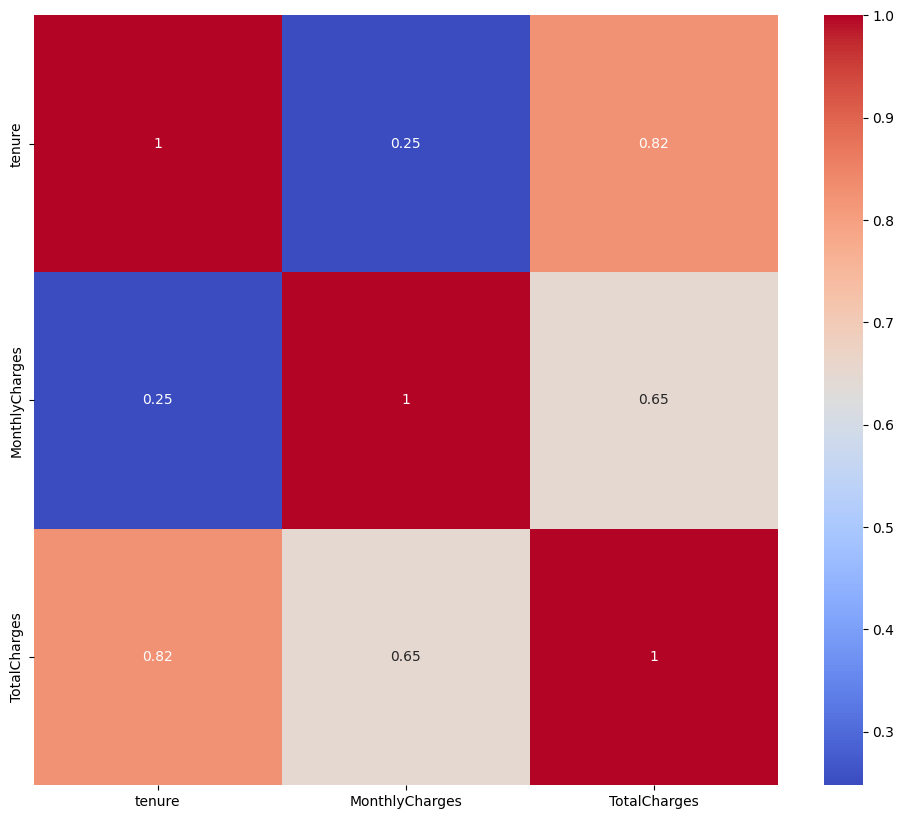

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt
correlation_matrix = train_data.corr(numeric_only=True)
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [64]:
import numpy as np


def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR


    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]

    print(f'Number of outliers in {column}: {outliers.shape[0]}')
    return outliers


numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']


for feature in numerical_features:
    outliers = detect_outliers_iqr(train_data, feature)
    print(outliers[[feature]])


Number of outliers in tenure: 0
Empty DataFrame
Columns: [tenure]
Index: []
Number of outliers in MonthlyCharges: 0
Empty DataFrame
Columns: [MonthlyCharges]
Index: []
Number of outliers in TotalCharges: 0
Empty DataFrame
Columns: [TotalCharges]
Index: []


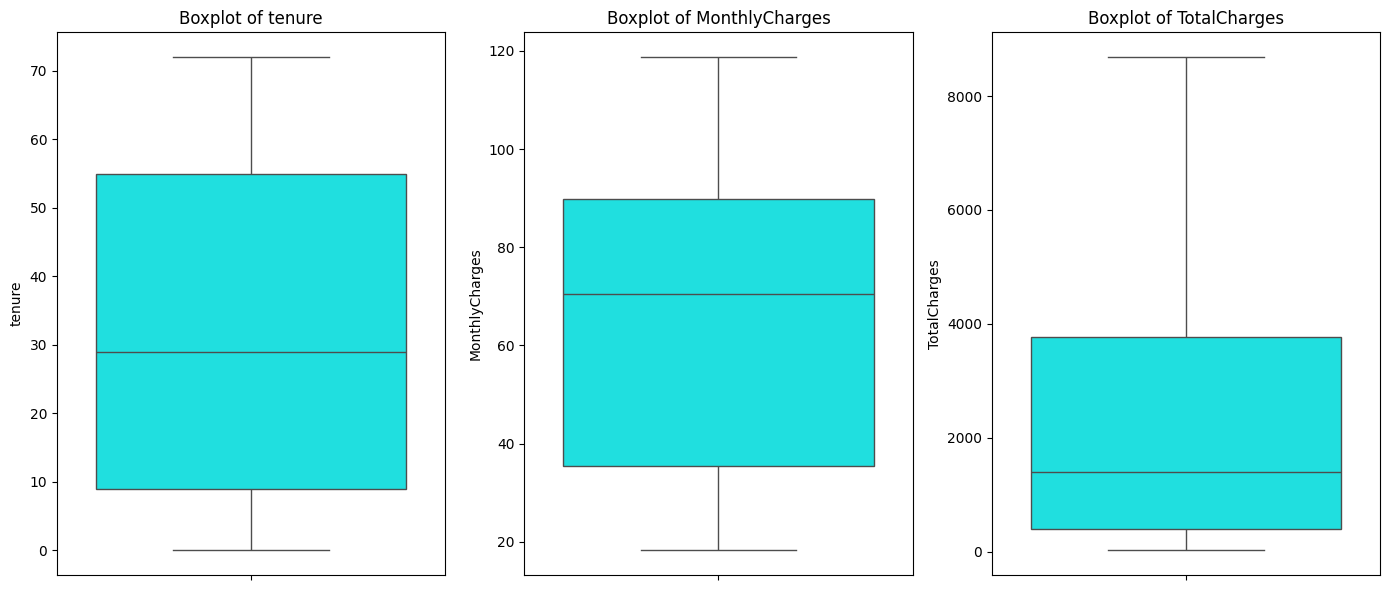

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(14, 6))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(y=train_data[feature], color='cyan')
    plt.title(f'Boxplot of {feature}')
plt.tight_layout()
plt.show()


In [66]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR


    df_cleaned = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    print(f'Removed outliers from {column}. Remaining rows: {df_cleaned.shape[0]}')
    return df_cleaned


for feature in numerical_features:
    train_data = remove_outliers_iqr(train_data, feature)


Removed outliers from tenure. Remaining rows: 5571
Removed outliers from MonthlyCharges. Remaining rows: 5571
Removed outliers from TotalCharges. Remaining rows: 5571


In [51]:
train_data_dummies = pd.get_dummies(train_data, drop_first=True)
test_data_dummies = pd.get_dummies(test_data, drop_first=True)

In [52]:
if 'customerID' in train_data_dummies.columns:
    train_data_dummies.drop('customerID', axis=1, inplace=True)

if 'customerID' in test_data_dummies.columns:
    test_data_dummies.drop('customerID', axis=1, inplace=True)


**Spliting the data**

In [53]:
X = train_data_dummies.drop('Churn_Yes', axis=1)
y = train_data_dummies['Churn_Yes']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

**Model building**

In [54]:

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)


rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [55]:

y_pred = rf_model.predict(X_val)

print("Accuracy Score on Validation Set:", accuracy_score(y_val, y_pred))
print("\nClassification Report:\n", classification_report(y_val, y_pred))


Accuracy Score on Validation Set: 0.7991031390134529

Classification Report:
               precision    recall  f1-score   support

       False       0.82      0.93      0.87       813
        True       0.70      0.46      0.55       302

    accuracy                           0.80      1115
   macro avg       0.76      0.69      0.71      1115
weighted avg       0.79      0.80      0.78      1115



**Logistic Regression**

In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve


logreg_model = LogisticRegression(random_state=42, max_iter=1000)


logreg_model.fit(X_train, y_train)

y_pred_logreg = logreg_model.predict(X_val)

print("Logistic Regression Accuracy:", accuracy_score(y_val, y_pred_logreg))
print("\nClassification Report:\n", classification_report(y_val, y_pred_logreg))


conf_matrix = confusion_matrix(y_val, y_pred_logreg)
print("\nConfusion Matrix:\n", conf_matrix)


roc_auc = roc_auc_score(y_val, logreg_model.predict_proba(X_val)[:,1])
print("\nROC AUC Score:", roc_auc)


Logistic Regression Accuracy: 0.7928251121076233

Classification Report:
               precision    recall  f1-score   support

       False       0.83      0.90      0.86       813
        True       0.65      0.51      0.57       302

    accuracy                           0.79      1115
   macro avg       0.74      0.70      0.72      1115
weighted avg       0.78      0.79      0.78      1115


Confusion Matrix:
 [[730  83]
 [148 154]]

ROC AUC Score: 0.8214649365036698


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**Gradient BoostingClassifier**

In [57]:
from sklearn.ensemble import GradientBoostingClassifier


gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)


gb_model.fit(X_train, y_train)


y_pred_gb = gb_model.predict(X_val)


print("Gradient Boosting Accuracy:", accuracy_score(y_val, y_pred_gb))
print("\nClassification Report:\n", classification_report(y_val, y_pred_gb))


roc_auc_gb = roc_auc_score(y_val, gb_model.predict_proba(X_val)[:,1])
print("\nGradient Boosting ROC AUC Score:", roc_auc_gb)


Gradient Boosting Accuracy: 0.809865470852018

Classification Report:
               precision    recall  f1-score   support

       False       0.83      0.93      0.88       813
        True       0.72      0.49      0.58       302

    accuracy                           0.81      1115
   macro avg       0.77      0.71      0.73      1115
weighted avg       0.80      0.81      0.80      1115


Gradient Boosting ROC AUC Score: 0.8350541286869824


**Hyperparameter tunning**

In [77]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier
import numpy as np


gbc = GradientBoostingClassifier(random_state=42)


param_dist_gbc = {
    'n_estimators': np.arange(50, 300, 50),
    'learning_rate': np.linspace(0.01, 0.2, 10),
    'max_depth': np.arange(3, 8),
    'subsample': [0.6, 0.7, 0.8, 1.0]
}


random_gbc = RandomizedSearchCV(estimator=gbc, param_distributions=param_dist_gbc, n_iter=20, cv=5, scoring='accuracy', random_state=42, n_jobs=-1)


random_gbc.fit(X_train, y_train)


print("Best Parameters for Gradient Boosting (Random Search):", random_gbc.best_params_)
print("Best Accuracy Score for Gradient Boosting (Random Search):", random_gbc.best_score_)


best_random_gbc_model = random_gbc.best_estimator_
y_pred_random_gbc = best_random_gbc_model.predict(X_val)
print("Validation Accuracy (Gradient Boosting - Random Search):", accuracy_score(y_val, y_pred_random_gbc))

Best Parameters for Gradient Boosting (Random Search): {'subsample': 0.6, 'n_estimators': 250, 'max_depth': 6, 'learning_rate': 0.01}
Best Accuracy Score for Gradient Boosting (Random Search): 0.7986989979516137
Validation Accuracy (Gradient Boosting - Random Search): 0.8089686098654708


In [76]:

feature_names = X_train.columns

X_val = X_val[feature_names]


y_pred_random_gbc = best_random_gbc_model.predict(X_val)
print("Validation Accuracy (Gradient Boosting - Random Search):", accuracy_score(y_val, y_pred_random_gbc))

Validation Accuracy (Gradient Boosting - Random Search): 0.8089686098654708
